In [1]:
import matplotlib.pyplot as plt

from scipy.special import logit,expit

import tree_braider as trbr
import tree_reader as trr
import lumberjack

import numpy as np

In [2]:
r1 = {}

r1['feature'] = '0'
r1['split'] = 1
r1['features'] = ['1']
r1['samples'] = ['0','1','2']
r1['medians'] = [0]
r1['dispersions'] = [0]
r1['local_gains'] = None
r1['absolute_gains'] = None
r1['children'] = []


In [3]:
c1 = {}

c1['feature'] = '0'
c1['split'] = 1
c1['features']= ['1']
c1['samples'] = ['1','2']
c1['medians'] = [0]
c1['dispersions'] = [0]
c1['local_gains'] = None
c1['absolute_gains'] = None
c1['children'] = []

c2 = {}

c2['feature'] = '0'
c2['split'] = 1
c2['features']= ['1']
c2['samples'] = ['0']
c2['medians'] = [0]
c2['dispersions'] = [0]
c2['local_gains'] = None
c2['absolute_gains'] = None
c2['children'] = []


r1['children'] = [c1,c2]


In [4]:
test_counts = np.array([[1],[2],[3]])

test_forest = trr.Forest([r1],test_counts)

In [5]:
test_forest.nodes()

In [6]:
test_forest.truth_dictionary.sample_dictionary

{'0': 0, '1': 1, '2': 2}

In [7]:
test_forest.nodes()[2].index

2

In [8]:
test_forest.nodes()[2].lr_encoding_vectors()

[array([False,  True,  True]), array([ True, False, False])]

In [9]:
iris = np.loadtxt('../testing/iris.trunc')

In [10]:
iris_forest = lumberjack.fit(iris,trees=100,depth=2)

Setting context
Input:(150, 4)
Output:(150, 4)
CHECK TRUTH
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpg566zdq4
['input.counts', 'output.counts', 'tmp.i.header', 'tmp.o.header']
Generating trees
Running /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1
Command: /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1 generate -ic /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpg566zdq4/input.counts -oc /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpg566zdq4/output.counts -o /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpg566zdq4/tmp -auto -ifh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpg566zdq4/tmp.i.header -ofh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpg566zdq4/tmp.o.header -trees 100 -depth 2
Trying to readline

5.1 0
100
150,4

5.1 0
100
150,4
Automatic parameters:
ss:100
if:4
of:4
p:8
t:100
l:10
d:No
pm:Branch
Reading header: /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/t

Tree Pool: Sending 96
Tree Pool: Request for tree: 97
Tree Pool: Deriving 97
Deriving from prototype: 100,4,4
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpg566zdq4/tmp.96.compact
Derived from prototype, rank table size: (4, 100)
Tree Pool: Growing 97
SSME
Unwrapping tree
Tree Pool: Sending 97
Tree Pool: Request for tree: 98
Tree Pool: Deriving 98
Deriving from prototype: 100,4,4
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpg566zdq4/tmp.97.compact
Derived from prototype, rank table size: (4, 100)
Tree Pool: Growing 98
SSME
Unwrapping tree
Tree Pool: Sending 98
Tree Pool: Request for tree: 99
Tree Pool: Deriving 99
Deriving from prototype: 100,4,4
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpg566zdq4/tmp.98.compact
Derived from prototype, rank table size: (4, 100)
Unwrapping tree
Tree Pool: Growing 99
SSME
Tree Pool: Sending 99
Tree Pool: Request for tree: 100
Tree Pool: Deriving 100
Deriving from prototype: 100,4,4
Ser

In [11]:
iris_forest.nodes()[0].samples

['9',
 '48',
 '0',
 '36',
 '11',
 '14',
 '14',
 '49',
 '49',
 '47',
 '42',
 '42',
 '20',
 '22',
 '1',
 '1',
 '1',
 '35',
 '45',
 '6',
 '18',
 '21',
 '16',
 '31',
 '31',
 '15']

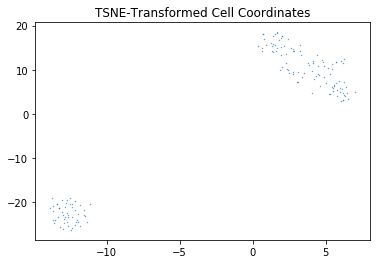

In [12]:
iftc = iris_forest.tsne()

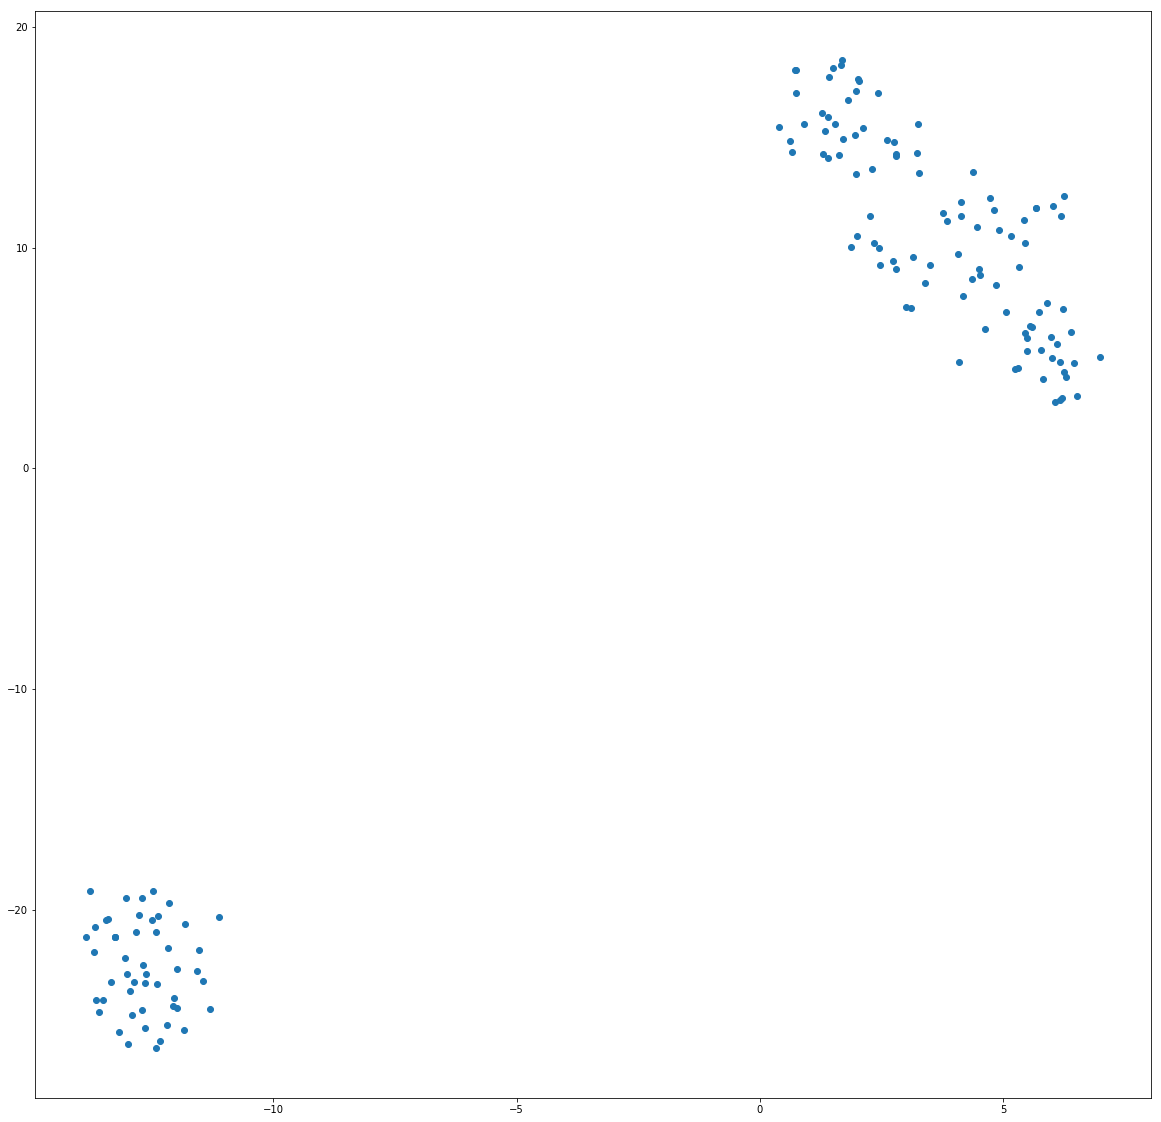

In [13]:
plt.figure(figsize=(20,20))
plt.scatter(iftc[:,0],iftc[:,1])
plt.show()

In [14]:
braids = trbr.IHMM(iris_forest)

In [15]:
# print(braids.hidden_states[0].sample_log_odds)
# print(braids.hidden_states[1].sample_log_odds)
# print(braids.hidden_states[2].sample_log_odds)
# print(braids.hidden_states[3].sample_log_odds)
# print(braids.hidden_states[4].sample_log_odds)

In [16]:
# print(braids.hidden_states[0].sample_log_odds)
# print(braids.hidden_states[1].sample_log_odds)
# print(braids.hidden_states[2].sample_log_odds)
# print(braids.hidden_states[3].sample_log_odds)
# print(braids.hidden_states[4].sample_log_odds)
# print(braids.hidden_states[4].node_odds())

In [17]:
[n.hidden_state for n in braids.nodes]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [18]:
for i in range(20):
    braids.sample_node_slice(100)

for hidden_state in braids.hidden_states[1:]:
    print(len(hidden_state.nodes))
    plt.figure(figsize=(20,20))
    plt.title(str(hidden_state.index))
    plt.scatter(iftc[:,0],iftc[:,1],c=hidden_state.lr_finite(),cmap='bwr')
    plt.show()
    plt.figure()
    plt.hist(hidden_state.node_odds())
    plt.show()

ValueError: <tree_reader.Node object at 0x1a1dca30f0> is not in list